<a href="https://colab.research.google.com/github/Walmeek/Telco-project/blob/main/Deep_learningbookANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
from keras.models import Sequential
from keras.layers import Dense

In [1]:
from google.colab import files
uploaded=files.upload()

Saving Folds5x2_pp.csv to Folds5x2_pp.csv


In [6]:
df=pd.read_csv("Folds5x2_pp.csv")


In [7]:
df.shape

(9568, 5)

In [8]:
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [10]:
df.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

In [12]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [13]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [16]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [17]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [20]:
df.fillna(df.mean())

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


In [22]:
df.rename(columns={"AT":"Average temperature","V":"Vacuum","AP":"Ambient pressure","RH":"Relative Humidity","PE":"Net Hourly Electrical energy "},inplace=True)

In [23]:
df

,Average temperature,Vacuum,Ambient pressure,Relative Humidity,Net Hourly Electrical energy
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


In [24]:
df.describe()

,Average temperature,Vacuum,Ambient pressure,Relative Humidity,Net Hourly Electrical energy
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [26]:
df.corr()

,Average temperature,Vacuum,Ambient pressure,Relative Humidity,Net Hourly Electrical energy
Average temperature,1.000000,0.844107,-0.507549,-0.542535,-0.948128
Vacuum,0.844107,1.000000,-0.413502,-0.312187,-0.869780
Ambient pressure,-0.507549,-0.413502,1.000000,0.099574,0.518429
Relative Humidity,-0.542535,-0.312187,0.099574,1.000000,0.389794
Net Hourly Electrical energy,-0.948128,-0.869780,0.518429,0.389794,1.000000


<Axes: >

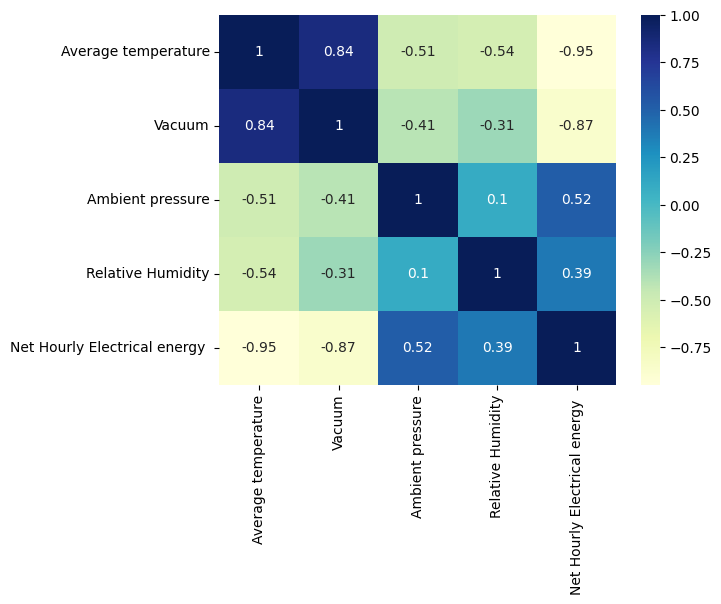

In [29]:
sns.heatmap(data=df.corr(), annot=True, cmap="YlGnBu")


Splitting the data


In [37]:
df.head()

,Average temperature,Vacuum,Ambient pressure,Relative Humidity,Net Hourly Electrical energy
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [43]:
y = df["Net Hourly Electrical energy "].values


In [47]:
X= df.drop("Net Hourly Electrical energy ",axis=1)

In [53]:
from sklearn.model_selection import train_test_split
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
X_train.shape

(7654, 4)

In [55]:
y_train.shape

(1914, 4)

In [56]:
y_test.shape

(1914,)

In [57]:
X_test.shape

(7654,)

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
ss=StandardScaler()

In [63]:
ss

StandardScaler()

In [64]:
X_train=ss.fit_transform(X_train)
X_train

array([[ 0.74805289,  0.72006931, -0.32660017, -0.49711722],
       [ 0.86181948,  1.26515721, -0.98521113,  0.8181501 ],
       [ 0.93409473,  1.52314975,  0.32523844,  0.80167494],
       ...,
       [-0.22097078, -0.834965  ,  0.36756563, -0.83554456],
       [ 0.94747903,  1.14245344, -0.41971997, -0.45455637],
       [-1.77355014, -1.19049131,  1.92520594,  0.91837402]])

In [67]:
X_test = X_test.reshape(-1, 1)
X_test=ss.fit_transform(X_test)
X_test

array([[-0.68132543],
       [-1.27945653],
       [-1.49695875],
       ...,
       [ 0.57632854],
       [-0.8158026 ],
       [ 1.75621962]])

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.callbacks import EarlyStopping

In [70]:
ann= Sequential()
ann

In [71]:
# object has been run created at 0x7b496c5ea8f0

In [72]:
#adding the layers of sequential model


In [74]:
ann.add(Dense(units=6,activation='relu'))    #this is 1st hidden layer

In [75]:
ann.add(Dense(units=6,activation='relu'))    #this is 2nd hidden layer